# Unsupervised Learning

In this assignment, you will apply your knowledge and experience with unsupervised learning algorithms to an existing network traffic dataset.

This assignment has three parts. The last part is open-ended.

1. Implement compute principal component analysis by hand on a "toy" dataset.
2. Use PCA to explore relationships between different performance metrics and datasets.
3. **Optional** Use an unsupervised learning method of your choice to detect outliers in the dataset(s).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

## Setup

Below is a dataset of random points that you will use to implement PCA by hand.

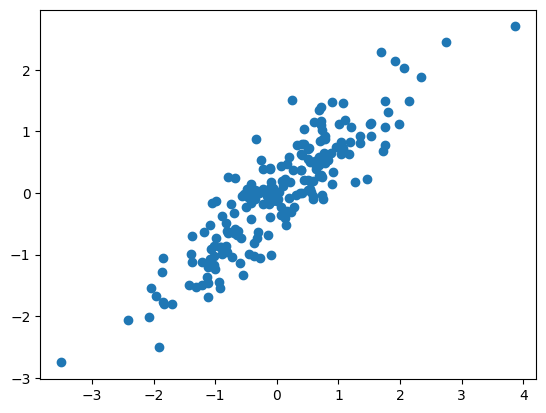

In [2]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

plt.show()

## Part 1: Principal Components Analysis (PCA) by Hand

### Step 1: Center Each Data Point on the Mean

Subtract the means, since we are concerned about capturing only variance.

### Step 2: Compute the Eigenvectors of the Covariance Matrix

Here we compute the covariance matrix of the mean-centered datapoints, and sort the eigenvectors according to the eigenvalues.  We can see the resulting eigenvectors and eigenvalues.

### Step 3: Project the Original Data onto the Eigenvectors

Project the original data onto the eigenvectors and plot the result.

## Part 2: PCA on Network Measurement Data

In this part of the assignment, you will use PCA to understand characteristics of active network traffic measurements, as gathered by the Federal Communications Commission's Measuring Broadband America program. 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

### PCA on FCC Measuring Broadband America Data

In this second part of the assignment, you will use Principal Component Analysis (PCA) to understand relationships between throughput ("speed"), web download speed, and latency. We have discussed in class the relationship between network latency and "speed", including aspects of performance like web page download time. 

To get a handle on this, let's look at the throughput test and latency first, for a particular Internet destination server in the dataset `sp2-vm-newyork-us.samknows.com`.

You may need to do some cleaning of the data to get this loaded into a dataframe.

### PCA in Two Dimensions (Throughput and Latency)

The cell below loads a subset of this data for your analysis for the rest of the assignment.

### Pre-Process the Data

This data has measurements from different "units", or devices that are located within ISP subscriber homes.

Perform a merge on unit ID to get a mean value for throughput and latency for each device to this server. 

### Visualize the Data

Plot the relationships between (1) latency and throughput; (2) latency and DNS lookup time; (3) latency and web page load time. What relationships do you observe, and why? (write your answer in a markdown cell below your visualization).

### Principal Component Analysis

In this part of the assignment, we will use PCA to explore the relationships between:
* Latency
* Web page load time

for this, you will need to load data from the web page test file, which we have provided.

### Pre-Process the Web and DNS Measurments

As above, take the average of (1) all web page load measurements per unit and (2) all DNS lookup time measurements and then merge that with the other two dimensions we already have to yield a matrix with four different dimensions.

The data will need some cleaning. Describe your process in a separate markdown cell.

### Visualizing the Original Data with Pairwise Plots

We know that there's an inverse relationship between the bytes per second of the speed test and latency, and a relationship between DNS lookup time and latency.  

It is also the case that speeds of web page loads "plateau" after a certain level of throughput speed. (Think about why this is the case.) 

Visualize these relationdhips with pairwise 2D plots of the relationships. We have provided a bit of code to make the arrangement of the subplots easier.
(Note that there are really only three relationships worth looking at below. The automated code plots all permutations of pairs for ease of reuse and visualization.)

What do these visualizations tell you about the relationships between speed, page load time, and DNS lookup time?

In [ ]:
from itertools import product 

fig, ax = plt.subplots(2,3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.25)

for (i,j) in product(np.arange(0,2),np.arange(0,3)):
    ax[i][j].scatter(X.values[:,i], X.values[:,j], alpha=0.2)
    ax[i][j].set(xlabel='Latency', ylabel='Throughput')
    ax[i][j].set_xlabel('{}'.format(X.columns[i]))
    ax[i][j].set_ylabel('{}'.format(X.columns[j]))

### Understanding the Data with PCA

The above exercise is effective, but it is a lot of plots!  Suppose you wanted to understand these relationships with fewer dimensions. PCA allows us to visualize these relationships with fewer dimensions. Reduce the dimensionality of the dataset to two dimensions, and use the *explained variance ratio* to explain which features capture the most variance in this dataset. (Write an explanation of what you see in a separate markdown box.)

## Part 3: Outlier Detection (Optional)

Use an unsupervised learning method of your choice to detect outliers in your dataset **using at least two of the dimensions**.  We are not looking for "one dimensional outliers" (e.g., latencies that exceed some value beyond a reasonable amount), but rather examples in the dataset that suggest a true anomaly.  Here are some examples:

* Abnormally high DNS lookup times for some values of latency
* Abnormally high web page load time for some values of network latency
* Abnormally poor performance from one unit ID (subscriber) along some dimension

Anything you can think of here will be acceptable so long as it is more than simply noticing that a single network metric will have outliers (yes, latency goes high for a single device at some times, but that's a simple anomaly to detect simply by measuring deviation from a mean. Try to identify some more complex relationships.)